<a href="https://colab.research.google.com/github/nandytowidyanto/Sanbercode/blob/main/Tugas_Hari_14_nandytowidyanto_gmail_com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download [austin_weather.csv](https://drive.google.com/uc?export=download&id=10JkPB2hhDmkVUoCGFP6gpoRL1mvx0OPf)



<h2>Soal 1: Visualisasi Scatter Plot Perbandingan Kuantitatif</h2>

Pada tugas kali ini kita akan mengamati nilai DewPointAvg (F) dengan mengamati nilai  HumidityAvg (%), TempAvg (F), dan WindAvg (MPG)

Perhatikan bahwa data kita tidaklah siap untuk di analisis, salah satunya tipe data dari DewPointAvg (F), HumidityAvg (%), dan WindAvg (MPG) adalah object, padahalnya data nya ber isi numeric. maka :
- Ubahlah tipe data tersebut menjadi tipe data float

Kemudian: 

- Kalian tidak akan dengan mudah mengubah tipe data tersebut karena column tersebut mempunyai nilai '-' yang dimana tidak bisa di ubah ke bentuk float, maka replace lah terlebih dahulu data yang bernilai '-' dengan nilai NaN, gunakan method .replace(). baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
- Isi nilai nan dengan nilai sebelumnya di row tersebut. gunakan method .fillna() dengan argument method bernilai 'ffill', baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
- Sekarang ubah tipe datanya dengan float, gunakan method .astype(), baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html

Setelah ini sebagian data siap untuk di jadikan bahan analisis. maka:

Buahlah visualisasi perbandingan kuantitatif scatter plot, sehingga menghasilkan gambar seperti dibawah:

ket: 

- colormap adalah 'coolwarm'
- berikat warna terhadap setiap data poin dengan nilai dari column TempAvgF
- berikan size terhadap setiap data poin dengan nilai dari column WindAvgMPH, kalikan dengan 20 agar size terlihat lebih besar


Berikan pendapat dari insight yang bisa di dapat dari visualisasi perbandingan kuantitatif ini!!!

![alt text](https://drive.google.com/uc?id=1Pp5oIc-39mcw2vrw6xgCRM9GsvyRtPI5)

In [ ]:
# Mengimport csv

import pandas as pd

url = "https://raw.githubusercontent.com/nandytowidyanto/Sanbercode/main/austin_weather.csv"
df = pd.read_csv(url)
print(df.head())

         Date  TempHighF  ...  PrecipitationSumInches               Events
0  2013-12-21         74  ...                    0.46  Rain , Thunderstorm
1  2013-12-22         56  ...                       0                     
2  2013-12-23         58  ...                       0                     
3  2013-12-24         61  ...                       0                     
4  2013-12-25         58  ...                       T                     

[5 rows x 21 columns]


In [ ]:
# Mengecek apa benar terdapat string '-' pada kolom yang disebutkan
df['DewPointAvgF'].str.contains('-').sum()

7

In [ ]:
import numpy as np
# Mengubah string '-' menjadi nilai NaN
df.replace('-',np.nan,inplace=True)
# Mengisi nilai NaN dengan nilai di depannya dengan method forward fill
df.fillna(method='ffill',inplace=True)
# Mengubah nilai kolom-kolom di soal menjadi type float
df=df[['DewPointAvgF','HumidityAvgPercent','TempAvgF','WindAvgMPH']].astype(float)

In [ ]:
# Mengecek berapa banyak nilai yang mengandung NaN di kolom-kolom tersebut
df.isnull().sum()

DewPointAvgF          0
HumidityAvgPercent    0
TempAvgF              0
WindAvgMPH            0
dtype: int64

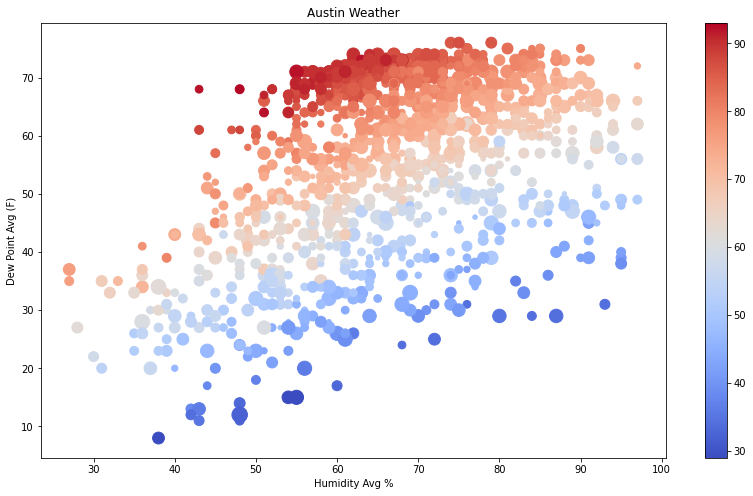

In [ ]:
# Memplot kolom-kolom tersebut ke dalam suatu scatter plot dengan metode plt.figure
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
plt.scatter(df['HumidityAvgPercent'],df['DewPointAvgF'],s=df['WindAvgMPH']*20,c=df['TempAvgF'],cmap='coolwarm')
plt.title('Austin Weather')
plt.xlabel('Humidity Avg %')
plt.ylabel('Dew Point Avg (F)')
plt.colorbar()
plt.show()

No handles with labels found to put in legend.


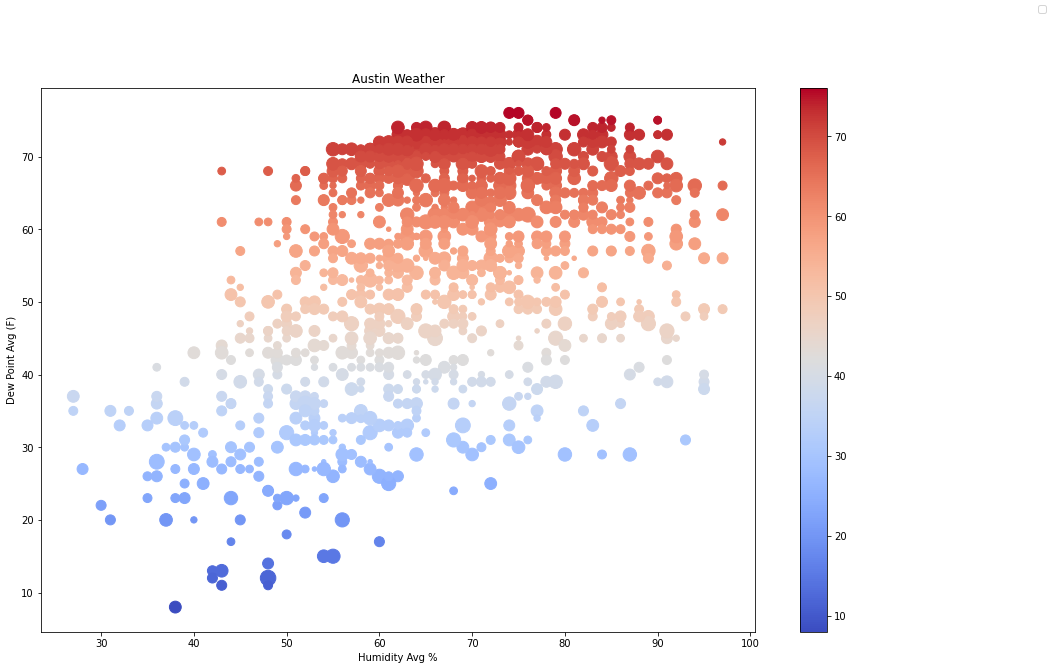

In [ ]:
# Membuat plot dengan fig,ax
fig, ax = plt.subplots(figsize = (16, 10))
a = ax.scatter(df['HumidityAvgPercent'], df['DewPointAvgF'], c = df['DewPointAvgF'], cmap = 'coolwarm', s = df['WindAvgMPH']*20)

fig.legend()
ax.set_xlabel('Humidity Avg %')
ax.set_ylabel('Dew Point Avg (F)')
ax.set_title('Austin Weather')
fig.colorbar(a)

Pendapat saya menurut perbandingan kuantitatif tersebut adalah semakin tinggi rata-rata humidity dan dew point, maka semakin tinggi suhu di Austin.

---

Downoad  <a href="https://blog.sanbercode.com/wp-content/uploads/2020/05/vgsales.csv">vgsales.csv</a>

In [2]:
# Mengimpor csv
import pandas as pd
url='https://raw.githubusercontent.com/nandytowidyanto/Sanbercode/main/vgsales.csv'
df=pd.read_csv(url)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<h2>Soal 2: Preparing Data</h2>

Manipulasi data tersebut dengan menggroupkan berdasarkan Genre, kemudian ambil rata2 penjualan untuk setiap Region Kecuali Global_Sales berdasarkan kategori Genre.

In [3]:
# Menggroupkan data
df_group = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()
df_group

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.264726,0.158323,0.048236,0.056508
Adventure,0.082271,0.049868,0.040490,0.013072
Fighting,0.263667,0.119481,0.103007,0.043255
Misc,0.235906,0.124198,0.061967,0.043312
Platform,0.504571,0.227573,0.147596,0.058228
Puzzle,0.212680,0.087251,0.098471,0.021564
Racing,0.287766,0.190865,0.045388,0.061865
Role-Playing,0.219946,0.126384,0.236767,0.040060
Shooter,0.444733,0.239137,0.029221,0.078389


Expected Output:

![alt text](https://drive.google.com/uc?id=1dR4vthSt22gM_LdfSBZCMIKPL6xd7nVl)

---

<h2>Soal 3: Perbandingan Kuantitatif Barplot - Grouping Visualisasi Dengan Barplot</h2>

1. Visualisasikan gambar yang tadi kita manipulasi, untuk menghasilkan visualisasi seperti di bawah ini
2. Tuliskan apa insight yang bisa kamu dapat dari visualisasi tersebut

In [ ]:
# Mentransform data supaya x-axis menjadi kolom2 sales
df_T=df_group.T
df_T

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,0.264726,0.082271,0.263667,0.235906,0.504571,0.212680,0.287766,0.219946,0.444733,0.211430,0.291283,0.100881
EU_Sales,0.158323,0.049868,0.119481,0.124198,0.227573,0.087251,0.190865,0.126384,0.239137,0.130773,0.160635,0.066579
JP_Sales,0.048236,0.040490,0.103007,0.061967,0.147596,0.098471,0.045388,0.236767,0.029221,0.073472,0.057702,0.072628
Other_Sales,0.056508,0.013072,0.043255,0.043312,0.058228,0.021564,0.061865,0.040060,0.078389,0.036355,0.057532,0.016681


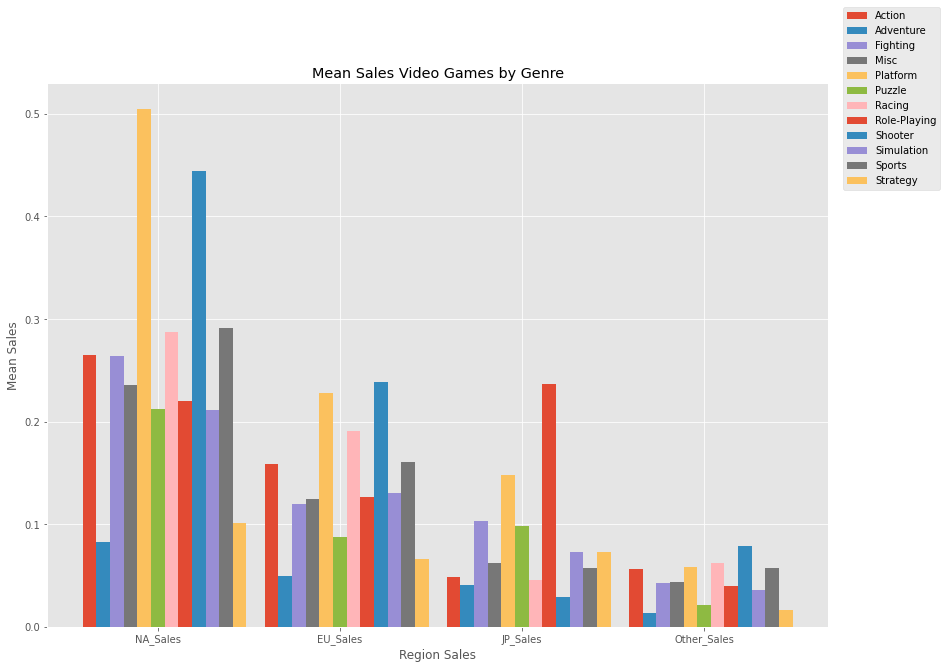

In [ ]:
# Memplot data ke dalam bar plot
fig,ax=plt.subplots(figsize=(14,10))
x=np.arange(0,16,4)
width=0.3
plt.style.use('ggplot')

y=df_T['Action']
y1=df_T['Adventure']
y2=df_T['Fighting']
y3=df_T['Misc']
y4=df_T['Platform']
y5=df_T['Puzzle']
y6=df_T['Racing']
y7=df_T['Role-Playing']
y8=df_T['Shooter']
y9=df_T['Simulation']
y10=df_T['Sports']
y11=df_T['Strategy']

ax.bar(x,y,width,label='Action')
ax.bar(x+0.3,y1,width,label='Adventure')
ax.bar(x+0.6,y2,width,label='Fighting')
ax.bar(x+0.9,y3,width,label='Misc')
ax.bar(x+1.2,y4,width,label='Platform')
ax.bar(x+1.5,y5,width,label='Puzzle')
ax.bar(x+1.8,y6,width,label='Racing')
ax.bar(x+2.1,y7,width,label='Role-Playing')
ax.bar(x+2.4,y8,width,label='Shooter')
ax.bar(x+2.7,y9,width,label='Simulation')
ax.bar(x+3.0,y10,width,label='Sports')
ax.bar(x+3.3,y11,width,label='Strategy')

ax.set_xticks(x+1.5)
ax.set_xticklabels(df_T.index)
ax.set_title('Mean Sales Video Games by Genre')
ax.set_xlabel('Region Sales')
ax.set_ylabel('Mean Sales')
ax.legend(bbox_to_anchor=(1.15,1.15))
plt.show()

In [ ]:
# Mengecek df enumerate
for i,j in enumerate(df_T.columns):
  print(i,j)

0 Action
1 Adventure
2 Fighting
3 Misc
4 Platform
5 Puzzle
6 Racing
7 Role-Playing
8 Shooter
9 Simulation
10 Sports
11 Strategy


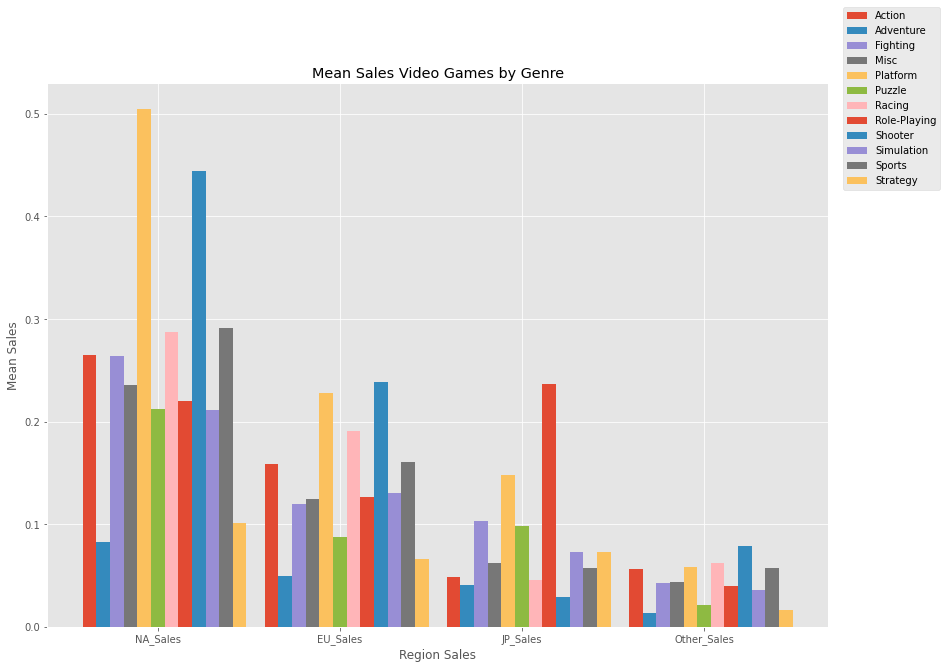

In [ ]:
# Memplot data ke dalam bar plot dengan enumerate
fig,ax=plt.subplots(figsize=(14,10))
x=np.arange(0,16,4)
width=0.3
plt.style.use('ggplot')

for i,j in enumerate(df_T.columns):
  ax.bar(x+(i*width),df_T[j],width,label=j)

ax.set_xticks(x+1.5)
ax.set_xticklabels(df_T.index)
ax.set_title('Mean Sales Video Games by Genre')
ax.set_xlabel('Region Sales')
ax.set_ylabel('Mean Sales')
ax.legend(bbox_to_anchor=(1.15,1.15))
plt.show()

Jawab: Insight yang saya dapat adalah mengenai rata-rata penjualan dari region amerika, eropa, jepang, dan lainnya yang dibagi berdasarkan genre. Dapat dilihat dari grafik bahwa 3 rata-rata penjualan tertinggi adalah di amerika dengan genre platform serta shooter, dan di eropa dengan genre shooter.

Expected Output:

![alt text](https://drive.google.com/uc?id=1A2s9Uy2i471VEYIZqMoVUIlZnVOUc8ha)

---

<h2>Soal 4: Perbandingan Kuantitatif Barplot - Stack Barplot</h2>

1. Visualisasikan gambar yang tadi kita manipulasi, untuk menhasilkan visualisasi seperti di bawah ini
2. Tuliskan apa insight yang bisa kamu dapat dari visualisasi tersebut

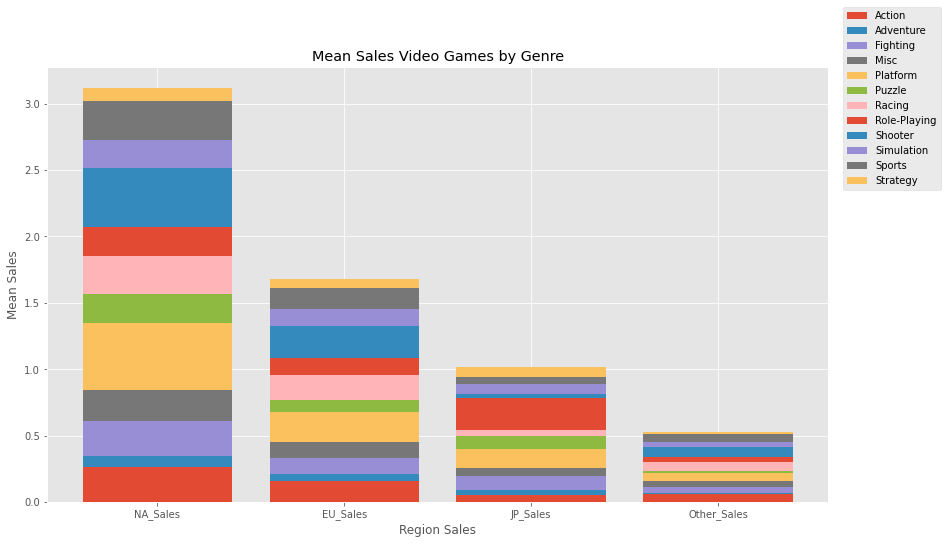

In [ ]:
# Memplot data ke dalam stacked bar plot
fig,ax=plt.subplots(figsize=(14,8))
x=df_T.index
width=0.8
plt.style.use('ggplot')
y_bottom=0

y=df_T['Action']
y1=df_T['Adventure']
y2=df_T['Fighting']
y3=df_T['Misc']
y4=df_T['Platform']
y5=df_T['Puzzle']
y6=df_T['Racing']
y7=df_T['Role-Playing']
y8=df_T['Shooter']
y9=df_T['Simulation']
y10=df_T['Sports']
y11=df_T['Strategy']

ax.bar(x,y,width,y_bottom,label='Action')
ax.bar(x,y1,width,y_bottom+y,label='Adventure')
ax.bar(x,y2,width,y_bottom+y+y1,label='Fighting')
ax.bar(x,y3,width,y_bottom+y+y1+y2,label='Misc')
ax.bar(x,y4,width,y_bottom+y+y1+y2+y3,label='Platform')
ax.bar(x,y5,width,y_bottom+y+y1+y2+y3+y4,label='Puzzle')
ax.bar(x,y6,width,y_bottom+y+y1+y2+y3+y4+y5,label='Racing')
ax.bar(x,y7,width,y_bottom+y+y1+y2+y3+y4+y5+y6,label='Role-Playing')
ax.bar(x,y8,width,y_bottom+y+y1+y2+y3+y4+y5+y6+y7,label='Shooter')
ax.bar(x,y9,width,y_bottom+y+y1+y2+y3+y4+y5+y6+y7+y8,label='Simulation')
ax.bar(x,y10,width,y_bottom+y+y1+y2+y3+y4+y5+y6+y7+y8+y9,label='Sports')
ax.bar(x,y11,width,y_bottom+y+y1+y2+y3+y4+y5+y6+y7+y8+y9+y10,label='Strategy')

ax.set_xticklabels(df_T.index)
ax.set_title('Mean Sales Video Games by Genre')
ax.set_xlabel('Region Sales')
ax.set_ylabel('Mean Sales')
ax.legend(bbox_to_anchor=(1.15,1.15))
plt.show()

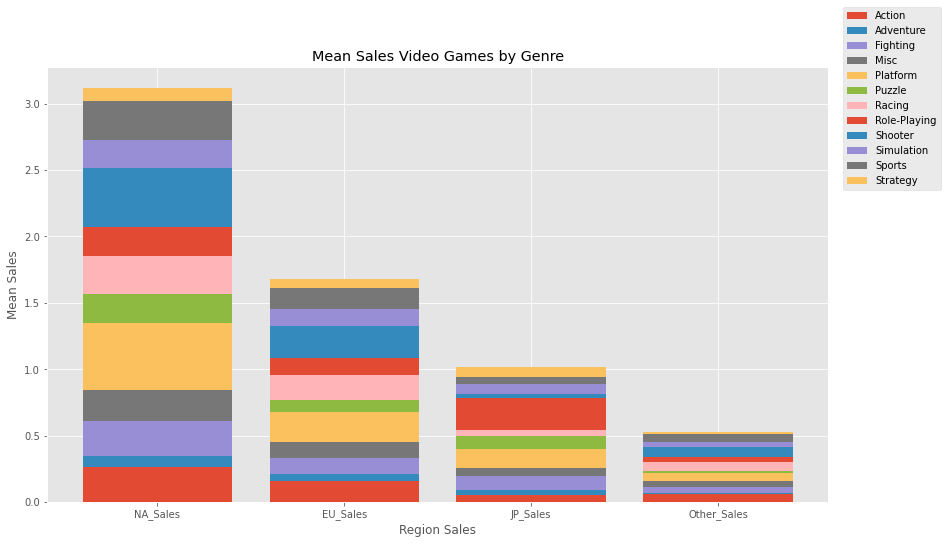

In [ ]:
# Memplot data ke dalam stacked bar plot dengan enumerate
fig,ax=plt.subplots(figsize=(14,8))
x=df_T.index
width=0.8
plt.style.use('ggplot')
y_bottom=0

for i,j in enumerate(df_T.columns):
  ax.bar(x,df_T[j],width,y_bottom,label=j)
  y_bottom += df_T[j]

ax.set_xticklabels(df_T.index)
ax.set_title('Mean Sales Video Games by Genre')
ax.set_xlabel('Region Sales')
ax.set_ylabel('Mean Sales')
ax.legend(bbox_to_anchor=(1.15,1.15))
plt.show()

Jawab: Insight yang saya dapat adalah mengenai rata-rata penjualan dari region amerika, eropa, jepang, dan lainnya yang dibagi berdasarkan genre. Dapat dilihat dari grafik bahwa 3 rata-rata penjualan tertinggi adalah di amerika dengan genre platform serta shooter, dan di eropa dengan genre shooter.

Expected Output:

![alt text](https://drive.google.com/uc?id=1_yis-3aZsEbsk68tpoPHoNlFftaz2GrO)